# Import numpy and pandas

In [84]:
import numpy as nm
import pandas as pd

# Import dataset in padas

In [85]:
loan_data="C:\\Users\\Vivek\\CaseStudy\\loan.csv"
loan=pd.read_csv(loan_data,low_memory=False)

# showing data

In [20]:
loan

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Our data shows there are column with null or nan so we have to remove them

In [86]:
loan=loan.dropna(axis=1,how='all')

# now lets show remaing columns info

In [87]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 57 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

# pie chart to show typesof loan status

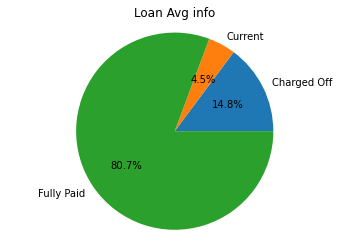

In [88]:
import matplotlib.pyplot as plt
chargedOfLoan=loan.loc[(loan["loan_status"])=="Charged Off"]
fullyPaidLoan=loan.loc[(loan ["loan_status"])=="Fully Paid"]
currentLoan=loan.loc[(loan["loan_status"])=="Current"]
data=[{"Charge Off":chargedOfLoan["funded_amnt_inv"].sum(),"Fully Paid":fullyPaidLoan["funded_amnt_inv"].sum(),"Current":currentLoan["funded_amnt_inv"].sum()}]
invested_data=pd.DataFrame(data)
chargedOfTotalSum=float(invested_data["Charge Off"])
fullyPaidTotalSum=float(invested_data["Fully Paid"])
currentTotalSum=float(invested_data["Current"])
loan_status=[chargedOfTotalSum,currentTotalSum,fullyPaidTotalSum]
loan_status_tags="Charged Off","Current","Fully Paid"
plt.pie(loan_status,labels=loan_status_tags,autopct='%1.1f%%')
plt.title("Loan Avg info")
plt.axis("equal")
plt.show()

# Pie chart to show purpose of loan

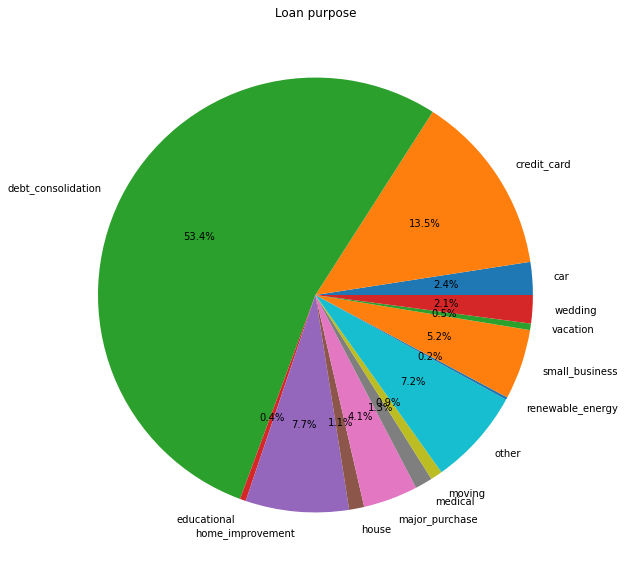

In [89]:
loanPurpose=loan.groupby(["purpose"])["funded_amnt_inv"].sum().reset_index()
plt.figure(figsize=(15,10))
plt.pie(loanPurpose["funded_amnt_inv"],labels=loanPurpose["purpose"],autopct='%1.1f%%')
plt.title("Loan purpose")
plt.show()

# looking at dataset we found that few columns are not required so dropping them and  showing info of rest of columns

In [90]:
colToDrop=["id","member_id","funded_amnt","emp_title","pymnt_plan","url","desc","title","zip_code","addr_state","delinq_2yrs","mths_since_last_delinq","mths_since_last_record","revol_bal","initial_list_status","out_prncp","out_prncp_inv","total_pymnt","total_pymnt_inv","total_rec_prncp","total_rec_int","total_rec_late_fee","recoveries","collection_recovery_fee","last_pymnt_d","last_pymnt_amnt","next_pymnt_d","last_credit_pull_d","collections_12_mths_ex_med","policy_code","application_type","acc_now_delinq","chargeoff_within_12_mths","delinq_amnt","pub_rec_bankruptcies","tax_liens",]
loan.drop(colToDrop,axis=1,inplace=True)


In [91]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            39717 non-null  int64  
 1   funded_amnt_inv      39717 non-null  float64
 2   term                 39717 non-null  object 
 3   int_rate             39717 non-null  object 
 4   installment          39717 non-null  float64
 5   grade                39717 non-null  object 
 6   sub_grade            39717 non-null  object 
 7   emp_length           38642 non-null  object 
 8   home_ownership       39717 non-null  object 
 9   annual_inc           39717 non-null  float64
 10  verification_status  39717 non-null  object 
 11  issue_d              39717 non-null  object 
 12  loan_status          39717 non-null  object 
 13  purpose              39717 non-null  object 
 14  dti                  39717 non-null  float64
 15  earliest_cr_line     39717 non-null 

In [92]:
loan

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,issue_d,loan_status,purpose,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc
0,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,...,Dec-11,Fully Paid,credit_card,27.65,Jan-85,1,3,0,83.70%,9
1,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,...,Dec-11,Charged Off,car,1.00,Apr-99,5,3,0,9.40%,4
2,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,...,Dec-11,Fully Paid,small_business,8.72,Nov-01,2,2,0,98.50%,10
3,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,...,Dec-11,Fully Paid,other,20.00,Feb-96,1,10,0,21%,37
4,3000,3000.0,60 months,12.69%,67.79,B,B5,1 year,RENT,80000.0,...,Dec-11,Current,other,17.94,Jan-96,0,15,0,53.90%,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,2500,1075.0,36 months,8.07%,78.42,A,A4,4 years,MORTGAGE,110000.0,...,Jul-07,Fully Paid,home_improvement,11.33,Nov-90,0,13,0,13.10%,40
39713,8500,875.0,36 months,10.28%,275.38,C,C1,3 years,RENT,18000.0,...,Jul-07,Fully Paid,credit_card,6.40,Dec-86,1,6,0,26.90%,9
39714,5000,1325.0,36 months,8.07%,156.84,A,A4,< 1 year,MORTGAGE,100000.0,...,Jul-07,Fully Paid,debt_consolidation,2.30,Oct-98,0,11,0,19.40%,20
39715,5000,650.0,36 months,7.43%,155.38,A,A2,< 1 year,MORTGAGE,200000.0,...,Jul-07,Fully Paid,other,3.72,Nov-88,0,17,0,0.70%,26


# removing NA from emp length an empty values from  revol util

In [93]:
loan.dropna(axis=0,subset=["emp_length"],inplace=True)
loan.dropna(axis=0,subset=["revol_util"],inplace=True)

# remove % and make the columns as numerics

In [94]:
loan["int_rate"]=pd.to_numeric(loan["int_rate"].apply(lambda x:x.split('%')[0]))
loan["revol_util"]=pd.to_numeric(loan["revol_util"].apply(lambda x:x.split('%')[0]))

# removing text from column

In [95]:
loan["term"]=pd.to_numeric(loan["term"].apply(lambda x:x.split()[0]))

In [96]:
loan

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,issue_d,loan_status,purpose,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc
0,5000,4975.0,36,10.65,162.87,B,B2,10+ years,RENT,24000.0,...,Dec-11,Fully Paid,credit_card,27.65,Jan-85,1,3,0,83.7,9
1,2500,2500.0,60,15.27,59.83,C,C4,< 1 year,RENT,30000.0,...,Dec-11,Charged Off,car,1.00,Apr-99,5,3,0,9.4,4
2,2400,2400.0,36,15.96,84.33,C,C5,10+ years,RENT,12252.0,...,Dec-11,Fully Paid,small_business,8.72,Nov-01,2,2,0,98.5,10
3,10000,10000.0,36,13.49,339.31,C,C1,10+ years,RENT,49200.0,...,Dec-11,Fully Paid,other,20.00,Feb-96,1,10,0,21.0,37
4,3000,3000.0,60,12.69,67.79,B,B5,1 year,RENT,80000.0,...,Dec-11,Current,other,17.94,Jan-96,0,15,0,53.9,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,2500,1075.0,36,8.07,78.42,A,A4,4 years,MORTGAGE,110000.0,...,Jul-07,Fully Paid,home_improvement,11.33,Nov-90,0,13,0,13.1,40
39713,8500,875.0,36,10.28,275.38,C,C1,3 years,RENT,18000.0,...,Jul-07,Fully Paid,credit_card,6.40,Dec-86,1,6,0,26.9,9
39714,5000,1325.0,36,8.07,156.84,A,A4,< 1 year,MORTGAGE,100000.0,...,Jul-07,Fully Paid,debt_consolidation,2.30,Oct-98,0,11,0,19.4,20
39715,5000,650.0,36,7.43,155.38,A,A2,< 1 year,MORTGAGE,200000.0,...,Jul-07,Fully Paid,other,3.72,Nov-88,0,17,0,0.7,26


# removing data for ongoing loans

In [97]:
loan=loan[loan["loan_status"].apply(lambda x:False if x=="Current" else True)]

In [79]:
loan

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,loan_amnt_range,int_rate_range,annual_inc_range,dti_range
0,5000,4975.0,36,10.65,low,B,B2,10,RENT,24000.0,...,Jan-85,1,3,0,83.7,9,0-5000,10-12.5,0-25000,25%+
1,2500,2500.0,60,15.27,low,C,C4,0,RENT,30000.0,...,Apr-99,5,3,0,9.4,4,0-5000,15+,25000-50000,0-5%
2,2400,2400.0,36,15.96,low,C,C5,10,RENT,12252.0,...,Nov-01,2,2,0,98.5,10,0-5000,15+,0-25000,5-10%
3,10000,10000.0,36,13.49,medium,C,C1,10,RENT,49200.0,...,Feb-96,1,10,0,21.0,37,5000-10000,12.5-15,25000-50000,15-20%
5,5000,5000.0,36,7.90,low,A,A4,3,RENT,36000.0,...,Nov-04,3,9,0,28.3,12,0-5000,7.5-10,25000-50000,10-15%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,2500,1075.0,36,8.07,low,A,A4,4,MORTGAGE,110000.0,...,Nov-90,0,13,0,13.1,40,0-5000,7.5-10,100000+,10-15%
39713,8500,875.0,36,10.28,medium,C,C1,3,RENT,18000.0,...,Dec-86,1,6,0,26.9,9,5000-10000,10-12.5,0-25000,5-10%
39714,5000,1325.0,36,8.07,low,A,A4,0,MORTGAGE,100000.0,...,Oct-98,0,11,0,19.4,20,0-5000,7.5-10,75000-100000,0-5%
39715,5000,650.0,36,7.43,low,A,A2,0,MORTGAGE,200000.0,...,Nov-88,0,17,0,0.7,26,0-5000,0-7.5,100000+,0-5%


# making emp_length more redable by program by remving > or < signs and converting them to 0 to 10 as 10 is highest so we will take 10 or more to 10 itself

In [98]:

loan["emp_length"] = pd.to_numeric(loan["emp_length"].apply(lambda x:0 if "<" in x else (x.split('+')[0] if "+" in x else x.split()[0])))


C:\Users\Vivek\AppData\Local\Temp\ipykernel_34128\1459290295.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



# update loan status

In [99]:
loan["loan_status"] = loan["loan_status"].apply(lambda x: 0 if x == "Fully Paid" else 1)

C:\Users\Vivek\AppData\Local\Temp\ipykernel_34128\1922575826.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



# removing outliers that is removing values that are very much higher than the avg of the columns and and are very few in numbers comparing to rest of data.

In [100]:
annual_inc_q = loan["annual_inc"].quantile(0.99)
loan = loan[loan["annual_inc"] < annual_inc_q]

open_acc_q = loan["open_acc"].quantile(0.999)
loan = loan[loan["open_acc"] < open_acc_q]

total_acc_q = loan["total_acc"].quantile(0.98)
loan = loan[loan["total_acc"] < total_acc_q]

pub_rec_q = loan["pub_rec"].quantile(0.995)
loan = loan[loan["pub_rec"] <= pub_rec_q]

# binning the dataset

In [101]:

bins = [0, 5000, 10000, 15000, 20000, 25000, 36000]
bucket_l = ['0-5000', '5000-10000', '10000-15000', '15000-20000', '20000-25000','25000+']
loan['loan_amnt_range'] = pd.cut(loan['loan_amnt'], bins, labels=bucket_l)

bins = [0, 7.5, 10, 12.5, 15, 100]
bucket_l = ['0-7.5', '7.5-10', '10-12.5', '12.5-15', '15+']
loan['int_rate_range'] = pd.cut(loan['int_rate'], bins, labels=bucket_l)

bins = [0, 25000, 50000, 75000, 100000, 1000000]
bucket_l = ['0-25000', '25000-50000', '50000-75000', '75000-100000', '100000+']
loan['annual_inc_range'] = pd.cut(loan['annual_inc'], bins, labels=bucket_l)

def installment(n):
    if n <= 200:
        return 'low'
    elif n > 200 and n <=500:
        return 'medium'
    elif n > 500 and n <=800:
        return 'high'
    else:
        return 'very high'

loan['installment'] = loan['installment'].apply(lambda x: installment(x))

bins = [-1, 5.00, 10.00, 15.00, 20.00, 25.00, 50.00]
bucket_l = ['0-5%', '5-10%', '10-15%', '15-20%', '20-25%', '25%+']
loan['dti_range'] = pd.cut(loan['dti'], bins, labels=bucket_l)



# plotting chart for amount of default

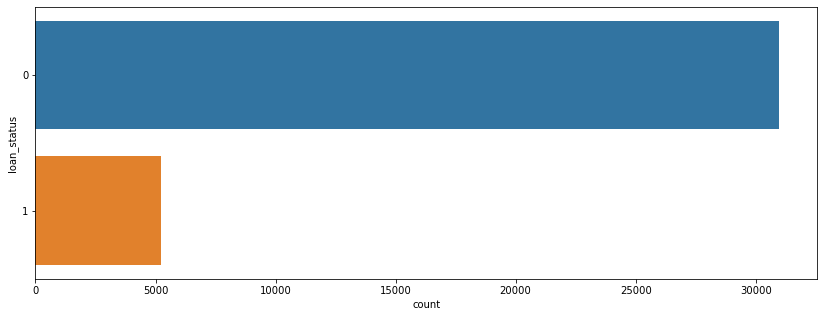

In [102]:
import seaborn as sns
plt.figure(figsize=(14,5))
sns.countplot(y="loan_status",data=loan)
plt.show()

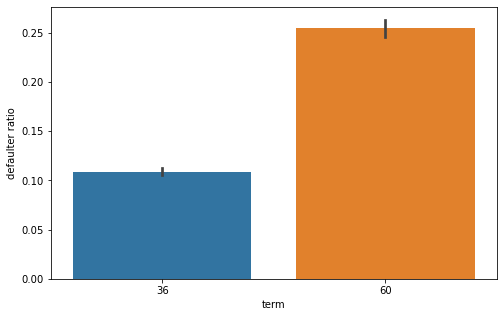

In [105]:
# checking defaulter with term
plt.figure(figsize=(8,5))
sns.barplot(x="term",y="loan_status",data=loan)
plt.xlabel("term",fontsize=10)
plt.ylabel("defaulter ratio",fontsize=10)
plt.show()

# is term benficial ----> yes

In [83]:
# checking deafulter with grade

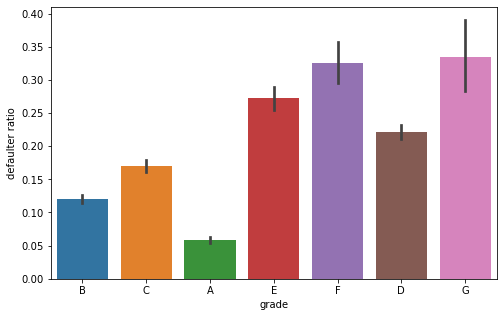

In [107]:
plt.figure(figsize=(8,5))
sns.barplot(x="grade",y="loan_status",data=loan)
plt.xlabel("grade",fontsize=10)
plt.ylabel("defaulter ratio",fontsize=10)
plt.show()

# is grade beneficial----> yes

In [108]:
# cheking with funded amount inv

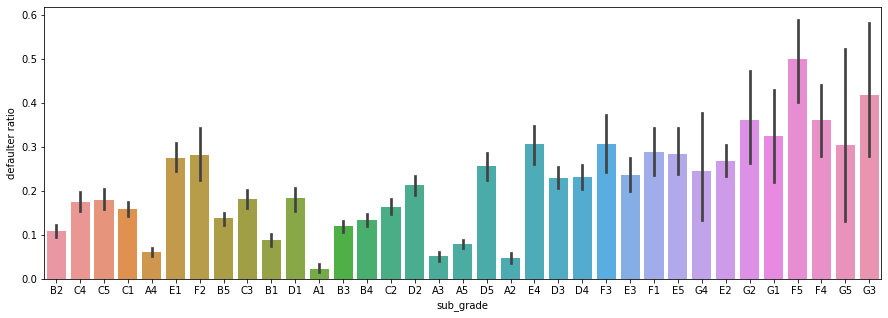

In [114]:
plt.figure(figsize=(15,5))
sns.barplot(x="sub_grade",y="loan_status",data=loan)
plt.xlabel("sub_grade",fontsize=10)
plt.ylabel("defaulter ratio",fontsize=10)
plt.show()

# is subgrade beneficial ----> Yes

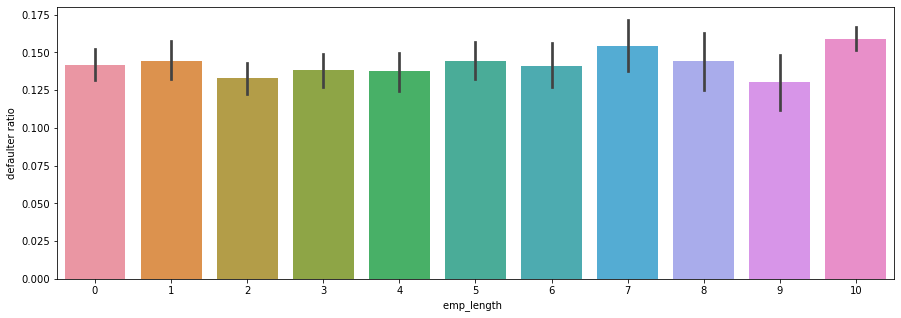

In [116]:
#checking with emp lenth
plt.figure(figsize=(15,5))
sns.barplot(x="emp_length",y="loan_status",data=loan)
plt.xlabel("emp_length  ",fontsize=10)
plt.ylabel("defaulter ratio",fontsize=10)
plt.show()

# is emp length beneficial ---- > NO


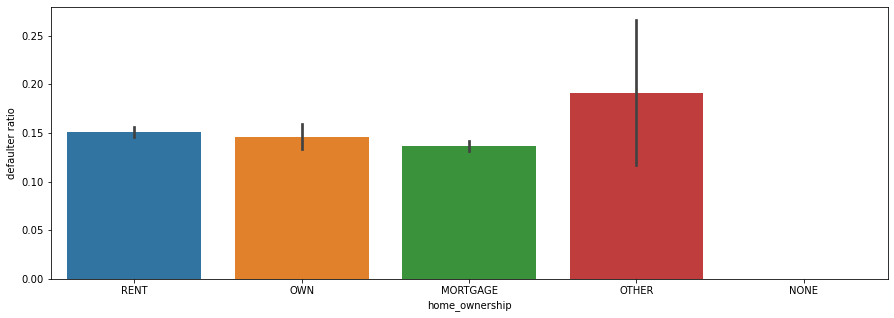

In [117]:
# checking with home ownership
plt.figure(figsize=(15,5))
sns.barplot(x="home_ownership",y="loan_status",data=loan)
plt.xlabel("home_ownership",fontsize=10)
plt.ylabel("defaulter ratio",fontsize=10)
plt.show()

# is home ownership beneficial---- > no

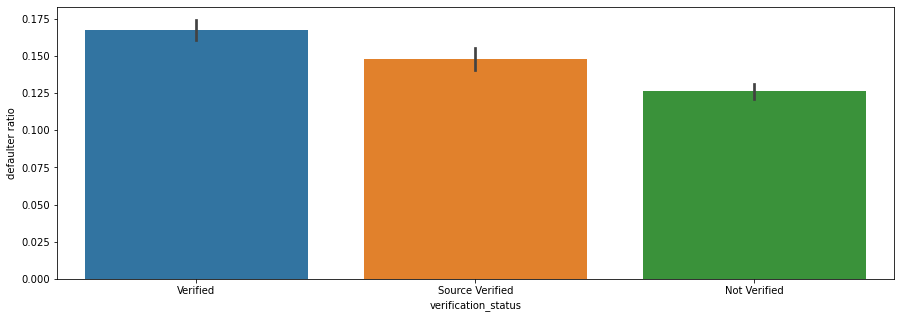

In [123]:
# checking with verifition status

plt.figure(figsize=(15,5))
sns.barplot(x="verification_status",y="loan_status",data=loan)
plt.xlabel("verification_status",fontsize=10)
plt.ylabel("defaulter ratio",fontsize=10)
plt.show()

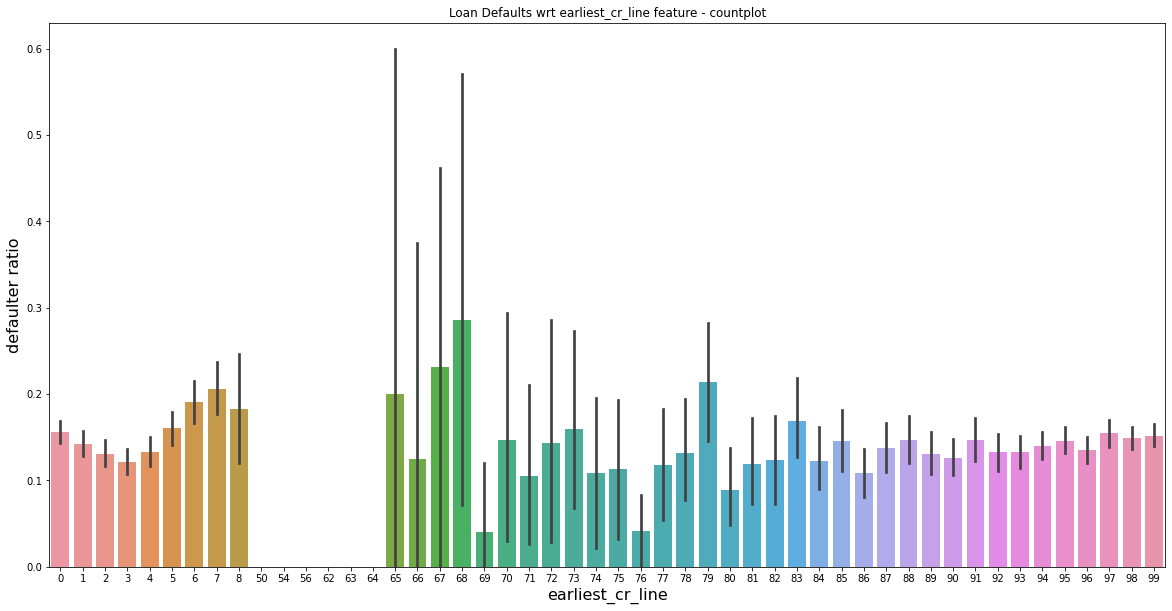

In [158]:
# checking with earliest credit line
loan["earliest_cr_line"] = pd.to_numeric(loan["earliest_cr_line"].apply(lambda x:x.split('-')[1]))

plt.figure(figsize=(20,10))
sns.barplot(x="earliest_cr_line", y='loan_status', data=loan)
plt.title("Loan Defaults wrt "+str("earliest_cr_line")+" feature - countplot")
plt.xlabel("earliest_cr_line", fontsize=16)
plt.ylabel("defaulter ratio", fontsize=16)
plt.show()

# is earliest_cr_line beneficial -----> No

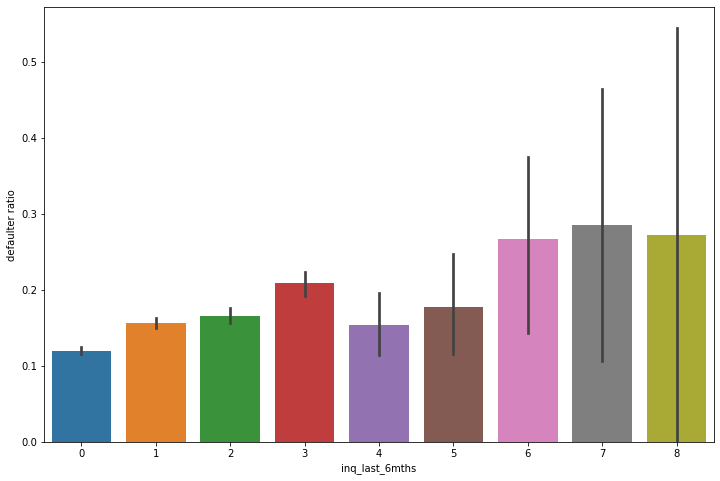

In [128]:
# check with inq last 6 month
plt.figure(figsize=(12,8))
sns.barplot(x="inq_last_6mths",y="loan_status",data=loan)
plt.xlabel("inq_last_6mths",fontsize=10)
plt.ylabel("defaulter ratio",fontsize=10)
plt.show()

# is last 6 month inq beneficial ----> no

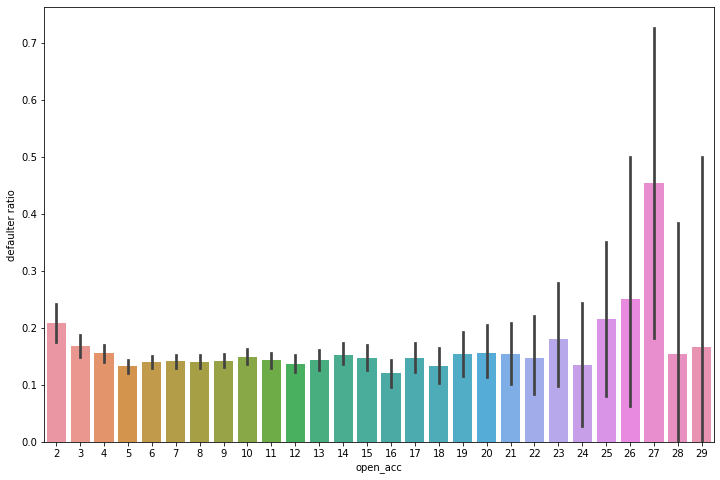

In [130]:
# checking with open account
plt.figure(figsize=(12,8))
sns.barplot(x="open_acc",y="loan_status",data=loan)
plt.xlabel("open_acc",fontsize=10)
plt.ylabel("defaulter ratio",fontsize=10)
plt.show()

# is open account beneficial -----> No

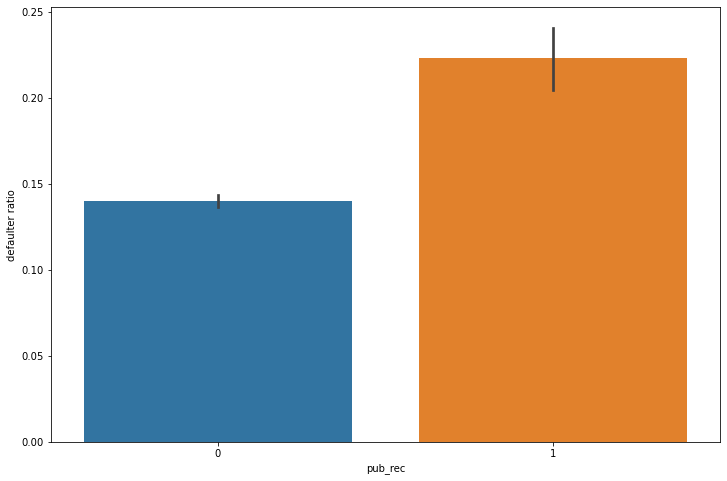

In [131]:
# cheking with pub record
plt.figure(figsize=(12,8))
sns.barplot(x="pub_rec",y="loan_status",data=loan)
plt.xlabel("pub_rec",fontsize=10)
plt.ylabel("defaulter ratio",fontsize=10)
plt.show()

# is public record beneficial -----> NO

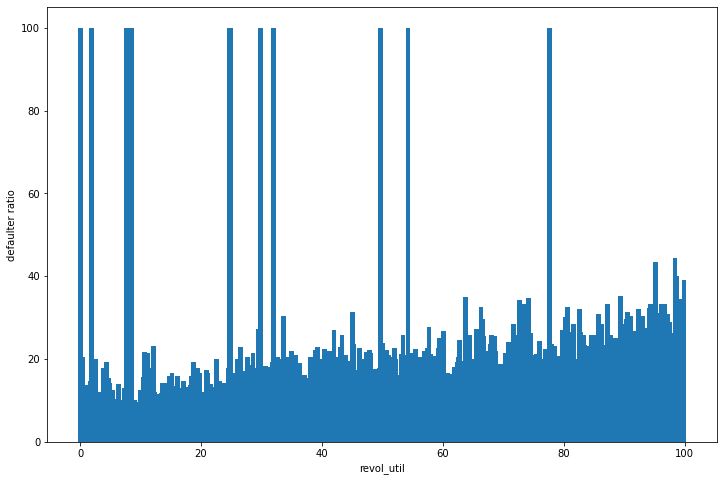

In [159]:
# checking with revol util
plt.figure(figsize=(12,8))
rsorted=True
if rsorted:
    feature_dimension = sorted(loan["revol_util"].unique())
else:
    feature_dimension = loan["revol_util"].unique()

feature_values = []
for fd in feature_dimension:
    feature_filter = loan[loan["revol_util"]==fd]
    feature_count = len(feature_filter[feature_filter["loan_status"]==1])

    feature_values.append(feature_count*100/feature_filter["loan_status"].count())
plt.bar(feature_dimension, feature_values)
plt.xlabel("revol_util",fontsize=10)
plt.ylabel("defaulter ratio",fontsize=10)
plt.show()

# is revol util rate beneficial ---> yes

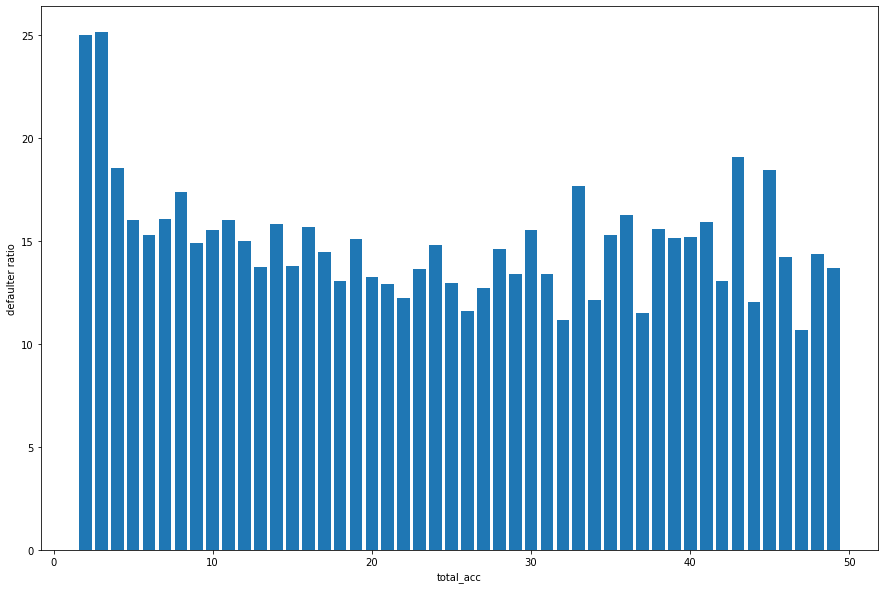

In [162]:
# cheking for total account
plt.figure(figsize=(15,10))
rsorted=True
if rsorted:
    feature_dimension = sorted(loan["total_acc"].unique())
else:
    feature_dimension = loan["total_acc"].unique()

feature_values = []
for fd in feature_dimension:
    feature_filter = loan[loan["total_acc"]==fd]
    feature_count = len(feature_filter[feature_filter["loan_status"]==1])

    feature_values.append(feature_count*100/feature_filter["loan_status"].count())
plt.bar(feature_dimension, feature_values)
plt.xlabel("total_acc",fontsize=10)
plt.ylabel("defaulter ratio",fontsize=10)
plt.show()

# is total_acc beneficial------ > no

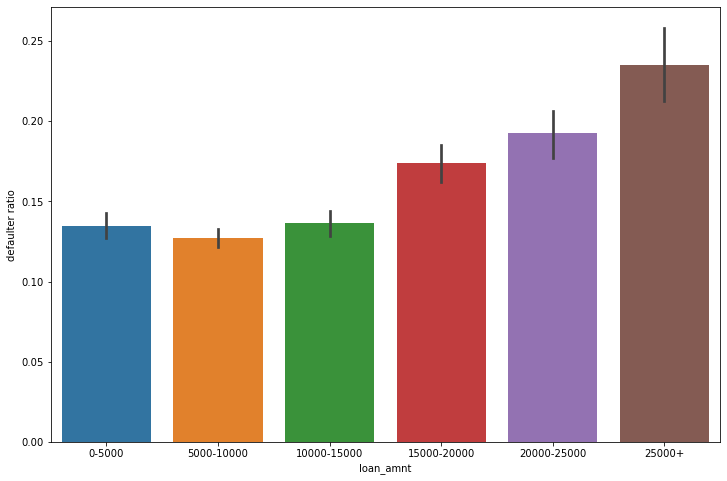

In [165]:
# cheking with loan amount
plt.figure(figsize=(12,8))
sns.barplot(x="loan_amnt_range",y="loan_status",data=loan)
plt.xlabel("loan_amnt",fontsize=10)
plt.ylabel("defaulter ratio",fontsize=10)
plt.show()

# is loan amount beneficial----- > yes

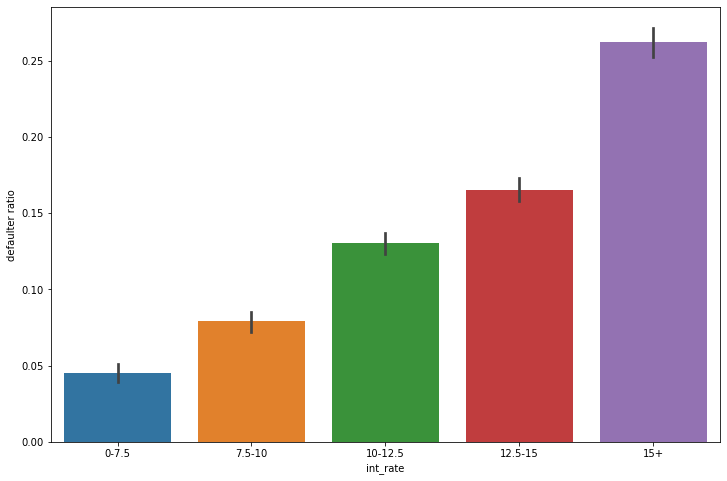

In [167]:
# checking with intrest rate
plt.figure(figsize=(12,8))
sns.barplot(x="int_rate_range",y="loan_status",data=loan)
plt.xlabel("int_rate",fontsize=10)
plt.ylabel("defaulter ratio",fontsize=10)
plt.show()

# is int _rate  benficial ----- > yes

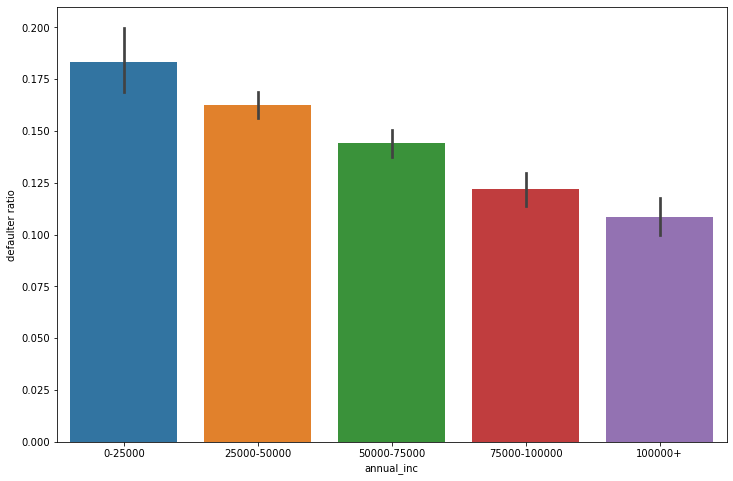

In [168]:
# cheking with annual income
plt.figure(figsize=(12,8))
sns.barplot(x="annual_inc_range",y="loan_status",data=loan)
plt.xlabel("annual_inc",fontsize=10)
plt.ylabel("defaulter ratio",fontsize=10)
plt.show()

# is annual income beneficial ----- > yes

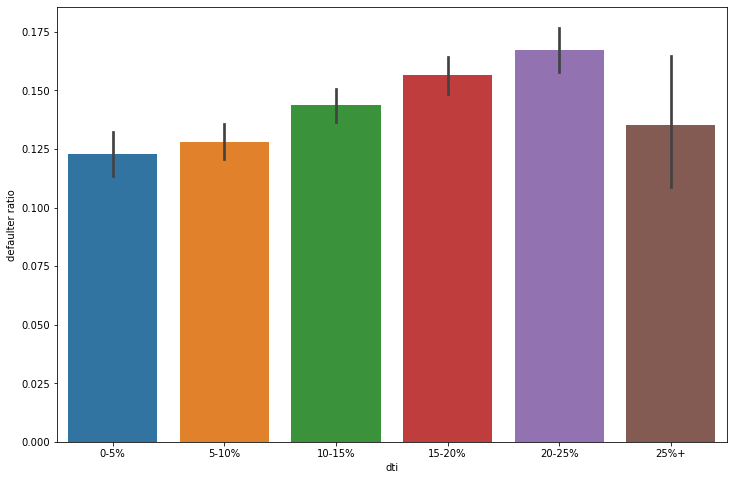

In [170]:
# checking with dti 
plt.figure(figsize=(12,8))
sns.barplot(x="dti_range",y="loan_status",data=loan)
plt.xlabel("dti",fontsize=10)
plt.ylabel("defaulter ratio",fontsize=10)
plt.show()

# is dti beneficial-----> yes but not much

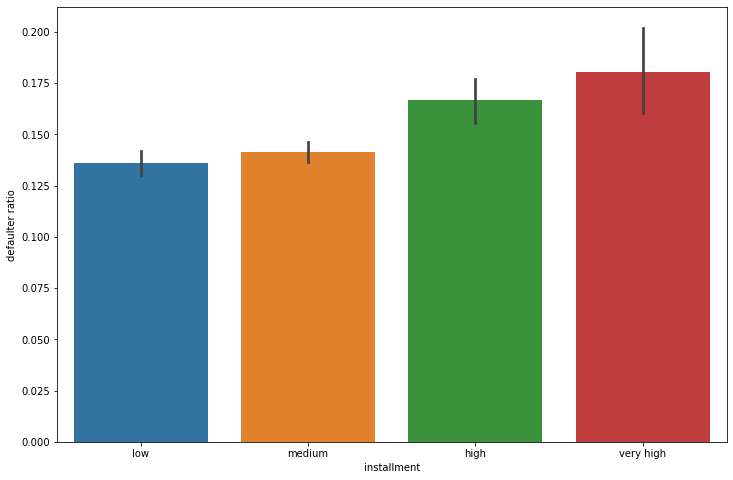

In [171]:
# checking with installment
plt.figure(figsize=(12,8))
sns.barplot(x="installment",y="loan_status",data=loan)
plt.xlabel("installment",fontsize=10)
plt.ylabel("defaulter ratio",fontsize=10)
plt.show()

# is intallment beneficial ------> yes

 ## now we have few columns which are useful

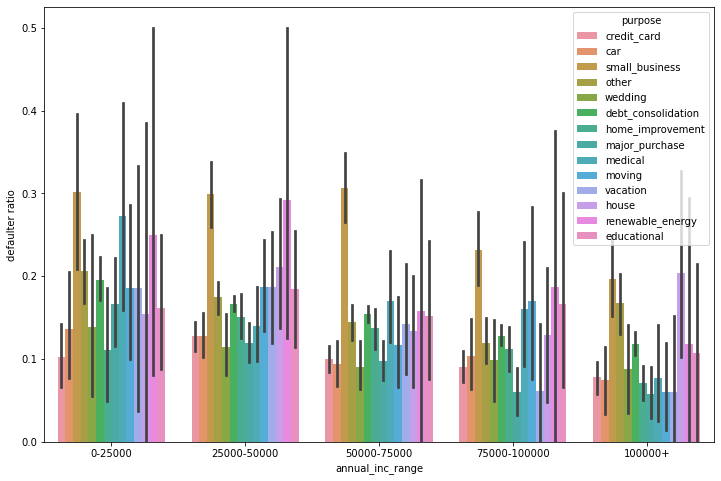

In [176]:
# cheking defaulters with annual income and purpose
plt.figure(figsize=(12,8))
sns.barplot(x="annual_inc_range",y="loan_status",hue="purpose",data=loan)
plt.xlabel("annual_inc_range",fontsize=10)
plt.ylabel("defaulter ratio",fontsize=10)
plt.show()

# is annual income with purpose beneficial----> no

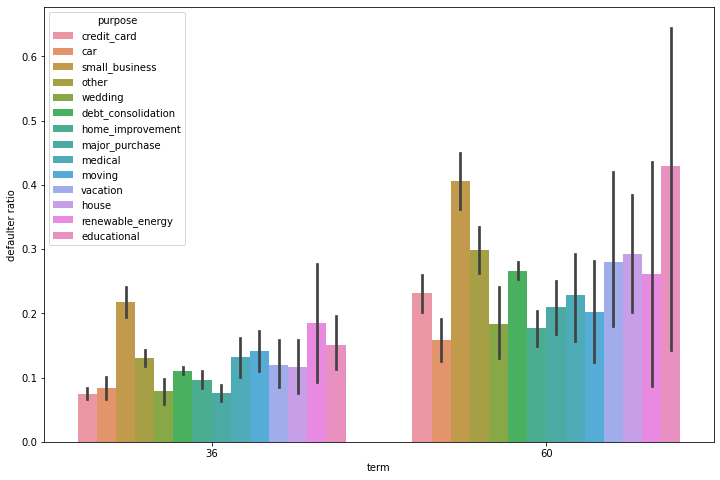

In [177]:
# cheking defaulters with term and purpose
plt.figure(figsize=(12,8))
sns.barplot(x="term",y="loan_status",hue="purpose",data=loan)
plt.xlabel("term",fontsize=10)
plt.ylabel("defaulter ratio",fontsize=10)
plt.show()

# is term with purpose baneficial -----> yes

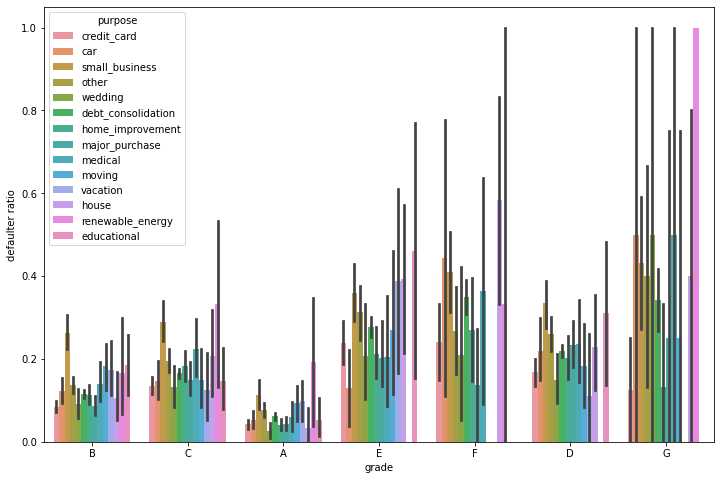

In [179]:
# cheking defaulters with term and purpose
plt.figure(figsize=(12,8))
sns.barplot(x="grade",y="loan_status",hue="purpose",data=loan)
plt.xlabel("grade",fontsize=10)
plt.ylabel("defaulter ratio",fontsize=10)
plt.show()

# is grade with purpose beneficial------ > yes

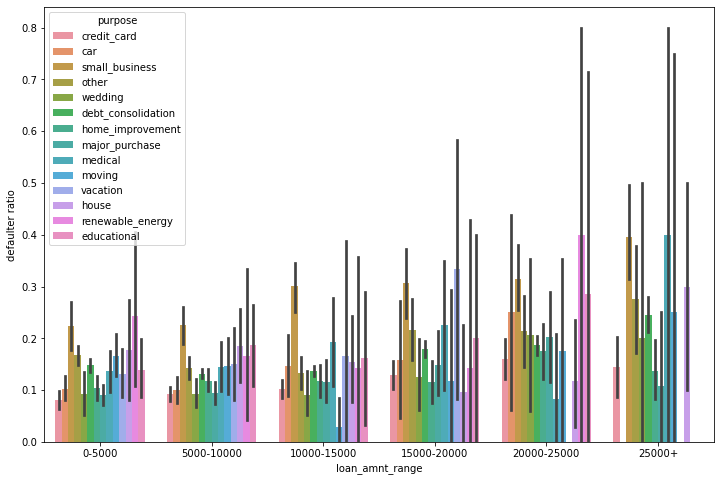

In [180]:
# cheking defaulters with loan amount and purpose
plt.figure(figsize=(12,8))
sns.barplot(x="loan_amnt_range",y="loan_status",hue="purpose",data=loan)
plt.xlabel("loan_amnt_range",fontsize=10)
plt.ylabel("defaulter ratio",fontsize=10)
plt.show()

# is loan amount with purpose beneficial----- > yes

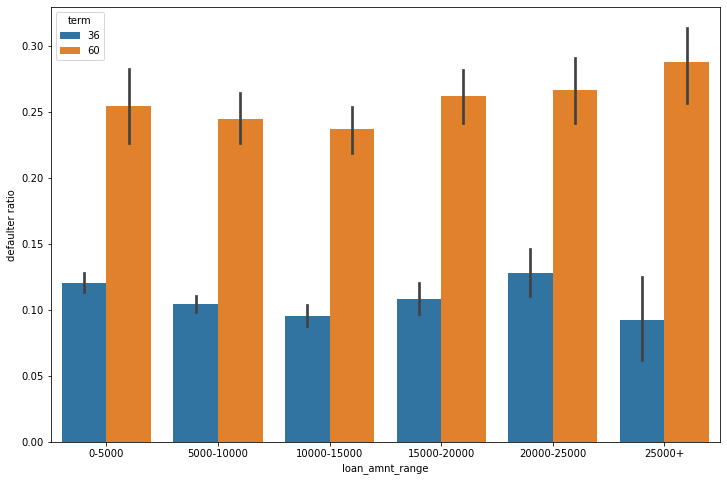

In [181]:
# cheking defaulters with loan amount and term
plt.figure(figsize=(12,8))
sns.barplot(x="loan_amnt_range",y="loan_status",hue="term",data=loan)
plt.xlabel("loan_amnt_range",fontsize=10)
plt.ylabel("defaulter ratio",fontsize=10)
plt.show()

# is loan amount with term beneficial----- > yes

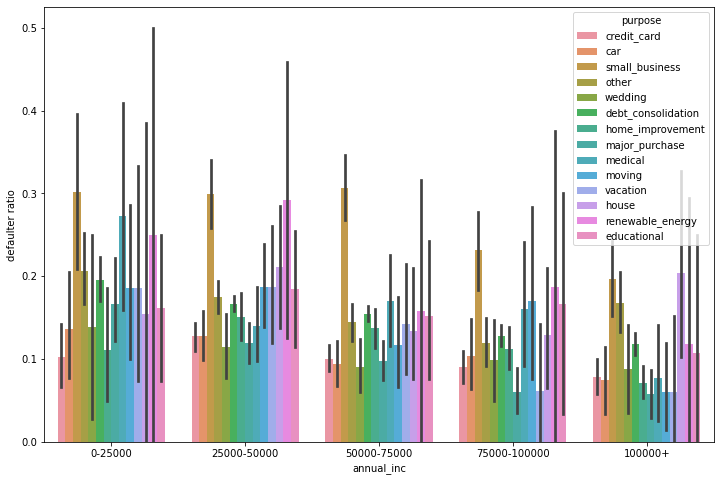

In [182]:
# cheking defaulters with annual income and purpose
plt.figure(figsize=(12,8))
sns.barplot(x="annual_inc_range",y="loan_status",hue="purpose",data=loan)
plt.xlabel("annual_inc",fontsize=10)
plt.ylabel("defaulter ratio",fontsize=10)
plt.show()

# is annual income  with purpose beneficial -----> yes

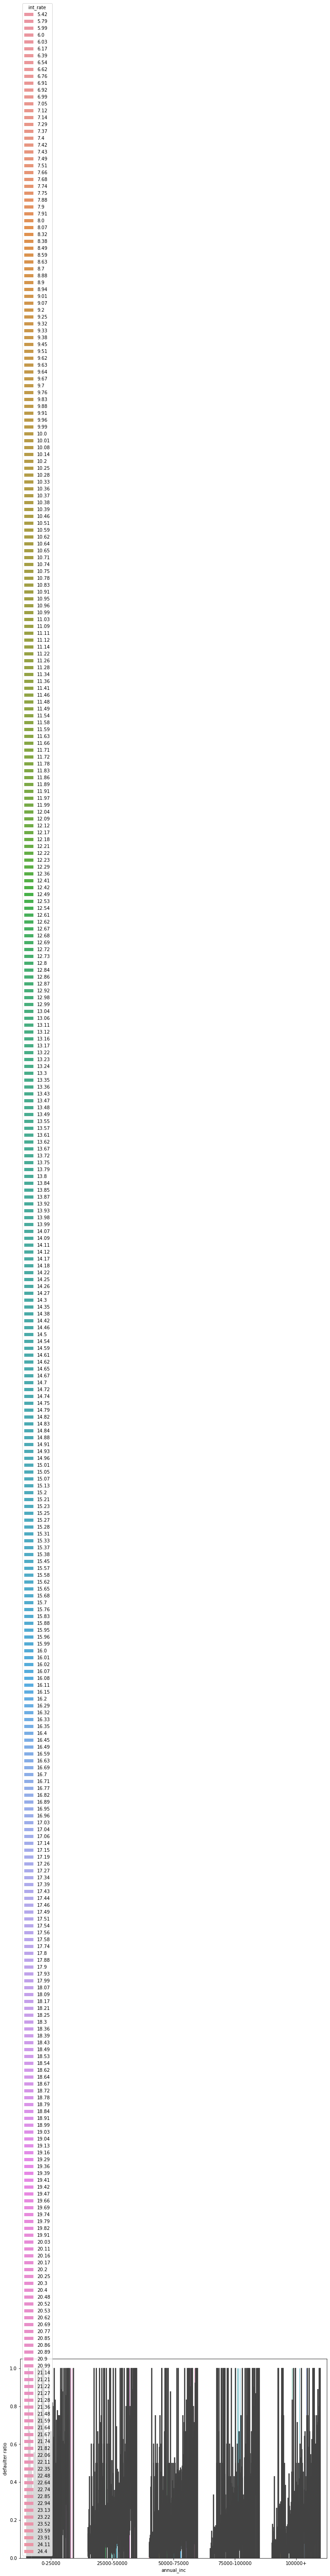

In [183]:
# cheking defaulters with annual income and intrest
plt.figure(figsize=(12,8))
sns.barplot(x="annual_inc_range",y="loan_status",hue="int_rate",data=loan)
plt.xlabel("annual_inc",fontsize=10)
plt.ylabel("defaulter ratio",fontsize=10)
plt.show()

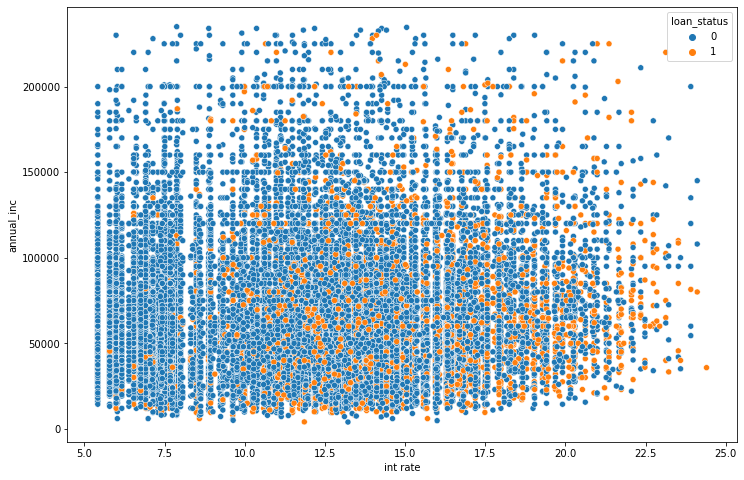

In [188]:
# cheking defaulters with annual income and intrest
plt.figure(figsize=(12,8))
sns.scatterplot(x="int_rate",y="annual_inc",hue="loan_status",data=loan)
plt.xlabel("int rate",fontsize=10)
plt.ylabel("annual_inc",fontsize=10)
plt.show()

# is annual income with intrest rate beneficial----- > no

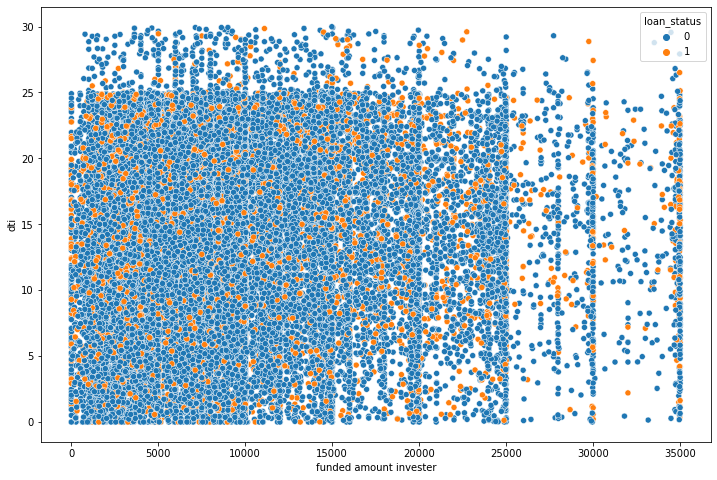

In [190]:
# cheking defaulters with funded amount_inv and dti
plt.figure(figsize=(12,8))
sns.scatterplot(x="funded_amnt_inv",y="dti",hue="loan_status",data=loan)
plt.xlabel("funded amount invester",fontsize=10)
plt.ylabel("dti",fontsize=10)
plt.show()

# is funded amount invester with dti beneficial-----> no

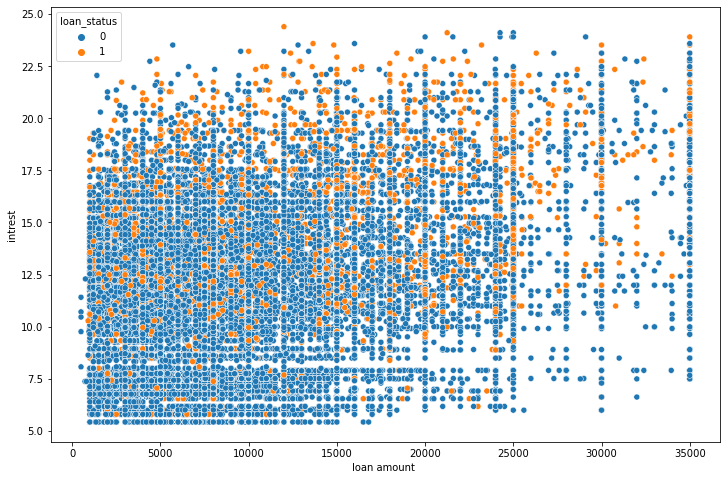

In [191]:
# cheking defaulters with loan amount and intrest rate
plt.figure(figsize=(12,8))
sns.scatterplot(x="loan_amnt",y="int_rate",hue="loan_status",data=loan)
plt.xlabel("loan amount ",fontsize=10)
plt.ylabel("intrest",fontsize=10)
plt.show()

# is loan amount with intrest rate benefical----- > no

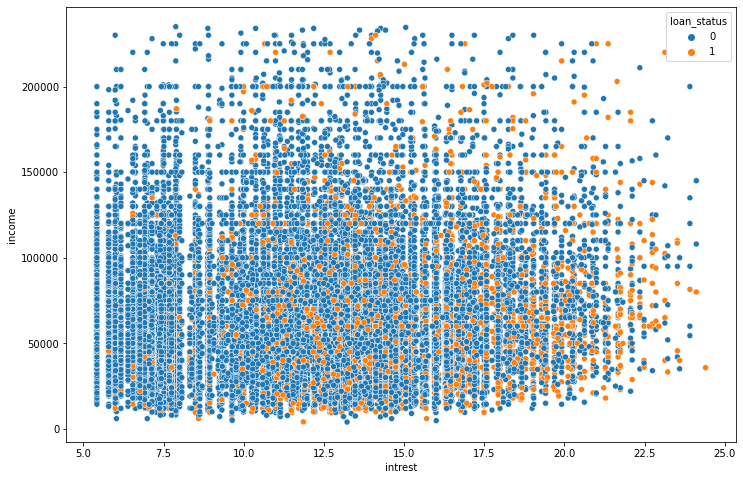

In [192]:
# cheking defaulters with annual income and intrest rate
plt.figure(figsize=(12,8))
sns.scatterplot(x="int_rate",y="annual_inc",hue="loan_status",data=loan)
plt.xlabel("intrest",fontsize=10)
plt.ylabel("income",fontsize=10)
plt.show()

# is annual income with intrest rate beneficial------ > yes

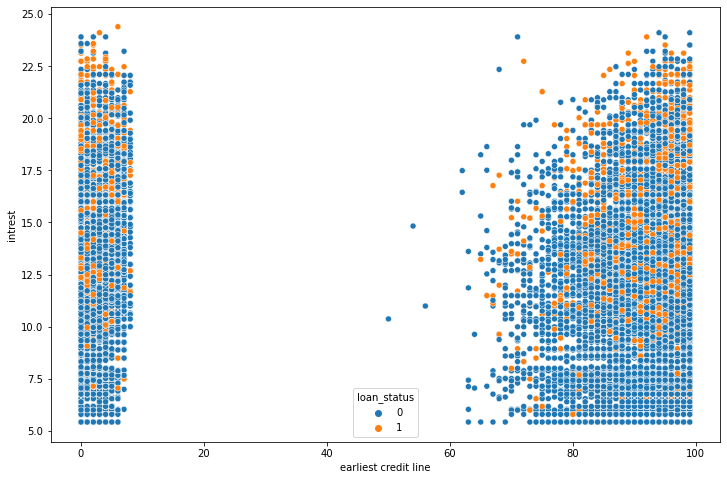

In [193]:
# cheking defaulters with earliest credit line and intrest rate
plt.figure(figsize=(12,8))
sns.scatterplot(x="earliest_cr_line",y="int_rate",hue="loan_status",data=loan)
plt.xlabel("earliest credit line",fontsize=10)
plt.ylabel("intrest",fontsize=10)
plt.show()

# is intrest rate with credit line benficial -----> yes

## creating a heatmap for the defined features

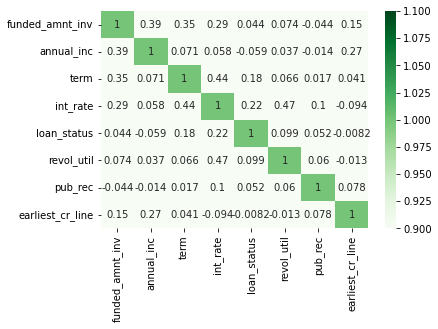

In [197]:
# heat map to see correlation of features
features=["funded_amnt_inv","annual_inc","term","int_rate","loan_status","revol_util","pub_rec","earliest_cr_line"]
features_corr=loan[features].corr()
sns.heatmap(features_corr,vmin=1.0,vmax=1.0,annot=True,cmap="Greens")
plt.show()

# from above we can see most high value are for term-intrest rate and intrest rate-revol_util values
## apart from that funded amount-annual income  and funded amount-term are also deriving factors